In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets.mnist import load_data

In [3]:
(x_train,y_train) , (x_test,y_test) = load_data()

In [4]:
len(x_test)

10000

In [5]:
len(x_train)

60000

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

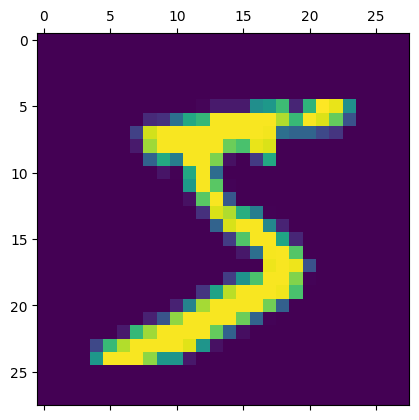

In [8]:
plt.matshow(x_train[0])

In [9]:
y_train[0]

np.uint8(5)

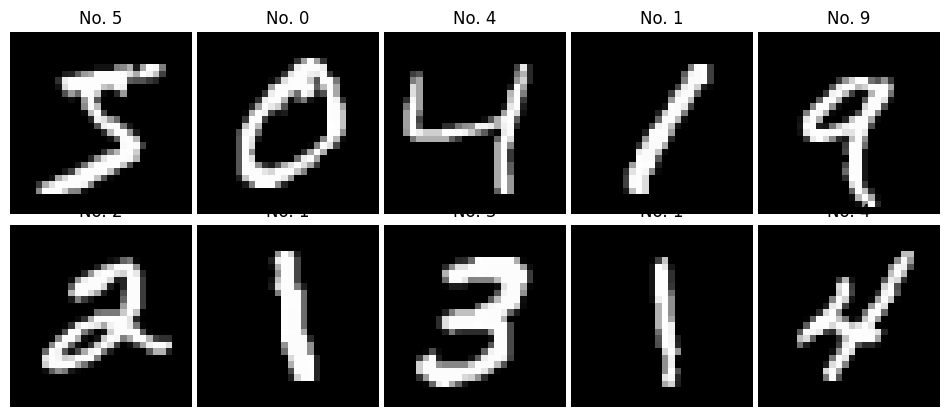

In [10]:
num_rows , num_cols = 2,5 
f , ax = plt.subplots(num_rows,num_cols,figsize=(12,5),
                        gridspec_kw = {'wspace':0.03,'hspace':0.01},
                        squeeze = True)

for r in range(num_rows):
        for c in range(num_cols):
                image_index = r*5+c
                ax[r,c].axis("off")
                ax[r,c].imshow(x_train[image_index],cmap='grey')
                ax[r,c].set_title('No. %d' %y_train[image_index])
plt.show()
plt.close()

Data Preprocessing 

In [11]:
x_test = x_test/255
x_train = x_train/255

In [12]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid')])

c:\Users\quant\anaconda\envs\ML_Compiler\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.8150 - loss: 0.7137
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9135 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9221 - loss: 0.2780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step - accuracy: 0.9241 - loss: 0.2695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step - accuracy: 0.9260 - loss: 0.2640


In [19]:
model.fit(x_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.9279 - loss: 0.2562
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9277 - loss: 0.2611
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9278 - loss: 0.2558
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9293 - loss: 0.2541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9315 - loss: 0.2520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9296 - loss: 0.2488
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 747us/step - accuracy: 0.9309 - loss: 0.2455
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.9313 - loss: 0.2488
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step - accuracy: 0.9335 - loss: 0.2439
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.9327 - loss: 0.2402


In [20]:
model.fit(x_train_flattened,y_train,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step - accuracy: 0.9344 - loss: 0.2410
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 751us/step - accuracy: 0.9336 - loss: 0.2412
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.9331 - loss: 0.2429
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.9340 - loss: 0.2422
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9335 - loss: 0.2334
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9349 - loss: 0.2383
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 764us/step - accuracy: 0.9359 - loss: 0.2287
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 753us/step - accuracy: 0.9341 - loss: 0.2376
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.9337 - loss: 0.2394
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.9352 - loss: 0.2351
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9331 - loss: 0.2404
Epoch 12

In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9173 - loss: 0.3094


[0.2750728130340576, 0.9269000291824341]

In [22]:
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step


array([4.6380719e-05, 4.4524148e-11, 2.2455613e-04, 9.7374898e-01,
       5.8706320e-04, 1.3470043e-01, 3.1481064e-11, 9.9991870e-01,
       4.4457074e-02, 6.2451017e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0])

np.int64(7)

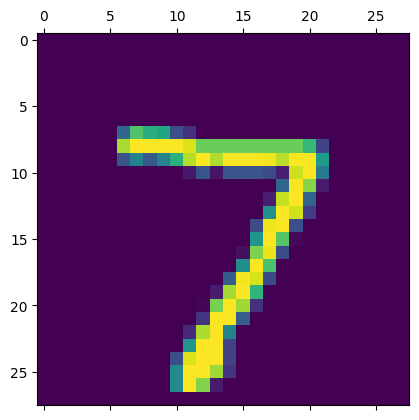

In [24]:
plt.matshow(x_test[0])

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape =(784,),activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
model.fit(x_train_flattened,y_train,batch_size=128,epochs=20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8114 - loss: 0.6732
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9459 - loss: 0.1878
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9627 - loss: 0.1345
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9722 - loss: 0.0986
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9777 - loss: 0.0795
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9803 - loss: 0.0676
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9841 - loss: 0.0558
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9866 - loss: 0.0486
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9890 - loss: 0.0400
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9908 - loss: 0.0365
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9923 - loss: 0.0300
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [28]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.9753 - loss: 0.0903


[0.08129938691854477, 0.9782000184059143]

In [29]:
from tensorflow.keras.models import load_model

model = load_model("mnist_model.h5")
